In [81]:
import pandas as pd
import datetime as dt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
calendar_december = pd.read_csv('calendar_December.csv')
calendar_march = pd.read_csv('calendar_March.csv')
calendar_june = pd.read_csv('calendar_June.csv')
calendar_september = pd.read_csv('calendar_September.csv')

In [43]:
calendar_december['date'] = pd.to_datetime(calendar_december['date'])
calendar_march['date'] = pd.to_datetime(calendar_march['date'])
calendar_june['date'] = pd.to_datetime(calendar_june['date'])
calendar_september['date'] = pd.to_datetime(calendar_september['date'])

In [44]:
common_listing_ids = set(calendar_december['listing_id']).intersection(calendar_march['listing_id'], calendar_june['listing_id'], calendar_september['listing_id'])
calendar_december = calendar_december[calendar_december['listing_id'].isin(common_listing_ids)]
calendar_march = calendar_march[calendar_march['listing_id'].isin(common_listing_ids)]
calendar_june = calendar_june[calendar_june['listing_id'].isin(common_listing_ids)]
calendar_september = calendar_september[calendar_september['listing_id'].isin(common_listing_ids)]

In [45]:
calendar_december = calendar_december.loc[calendar_december['date']<'2023-03-19',:]
calendar_march = calendar_march.loc[calendar_march['date']<'2023-06-18',:]
calendar_june = calendar_june.loc[calendar_june['date']<'2023-09-12',:]
calendar_september = calendar_september.loc[calendar_september['date']<'2023-12-20',:]

In [68]:
calendar_year = pd.concat([calendar_december,calendar_march,calendar_june,calendar_september])
calendar_year.sort_values(by=['listing_id', 'date'], inplace=True)
calendar_year = calendar_year.drop(['minimum_nights', 'maximum_nights'], axis=1)

In [50]:
calendar_unique = calendar_year.nunique()
calendar_unique

listing_id        5824
date               365
available            2
price             2853
adjusted_price    2864
dtype: int64

In [103]:
calendar_year['year'] = calendar_year['date'].dt.year
calendar_year['month'] = calendar_year['date'].dt.month
calendar_year['week'] = calendar_year['date'].dt.isocalendar().week
calendar_year['price'] = pd.to_numeric(calendar_year['price'].str.replace('$', '').str.replace(',', ''), errors='coerce')
calendar_year.head()

,listing_id,date,available,price,adjusted_price,year,month,week
0,2384,2022-12-20,t,80.0,$80.00,2022,12,51
1,2384,2022-12-21,t,80.0,$80.00,2022,12,51
2,2384,2022-12-22,t,80.0,$80.00,2022,12,51
3,2384,2022-12-23,t,95.0,$95.00,2022,12,51
4,2384,2022-12-24,t,95.0,$95.00,2022,12,51


### available vs not available ...?

In [98]:
calendar_year_available = calendar_year.loc[calendar_year['available']=='t', :]
calendar_year_available

,listing_id,date,available,price,adjusted_price,year,month,week
0,2384,2022-12-20,t,80.0,$80.00,2022,12,51
1,2384,2022-12-21,t,80.0,$80.00,2022,12,51
2,2384,2022-12-22,t,80.0,$80.00,2022,12,51
3,2384,2022-12-23,t,95.0,$95.00,2022,12,51
4,2384,2022-12-24,t,95.0,$95.00,2022,12,51
...,...,...,...,...,...,...,...,...
2228046,785430167716769323,2023-06-13,t,190.0,$190.00,2023,6,24
2228047,785430167716769323,2023-06-14,t,190.0,$190.00,2023,6,24
2228048,785430167716769323,2023-06-15,t,190.0,$190.00,2023,6,24
2228049,785430167716769323,2023-06-16,t,190.0,$190.00,2023,6,24


In [100]:
calendar_year_unavailable = calendar_year.loc[calendar_year['available']=='f', :]
calendar_year_unavailable

,listing_id,date,available,price,adjusted_price,year,month,week
18,2384,2023-04-06,f,100.0,$100.00,2023,4,14
19,2384,2023-04-07,f,100.0,$100.00,2023,4,14
20,2384,2023-04-08,f,100.0,$100.00,2023,4,14
21,2384,2023-04-09,f,100.0,$100.00,2023,4,14
23,2384,2023-04-11,f,100.0,$100.00,2023,4,15
...,...,...,...,...,...,...,...,...
2381354,785430167716769323,2023-12-15,f,159.0,$159.00,2023,12,50
2381355,785430167716769323,2023-12-16,f,159.0,$159.00,2023,12,50
2381356,785430167716769323,2023-12-17,f,159.0,$159.00,2023,12,50
2381357,785430167716769323,2023-12-18,f,159.0,$159.00,2023,12,51


## Visualizations

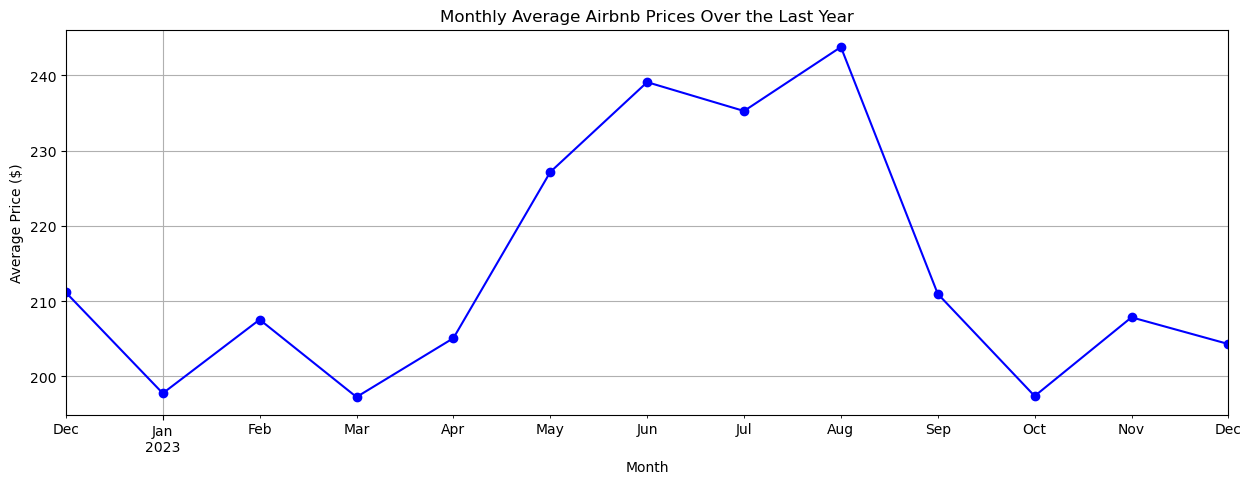

In [78]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter data to only include the last year.
one_year_ago = pd.Timestamp('2023-09-12') - pd.DateOffset(years=1)
last_year_data = calendar_year[calendar_year['date'] >= one_year_ago]

# Group by month and calculate the average price for each month
last_year_data['month'] = last_year_data['date'].dt.to_period('M')
monthly_prices = last_year_data.groupby('month')['price'].mean()

# Plotting the line graph
plt.figure(figsize=(15, 5))
monthly_prices.plot(kind='line', color='blue', marker='o', linestyle='-')
plt.title('Monthly Average Airbnb Prices Over the Last Year')
plt.xlabel('Month')
plt.ylabel('Average Price ($)')
plt.grid(True)

plt.show()


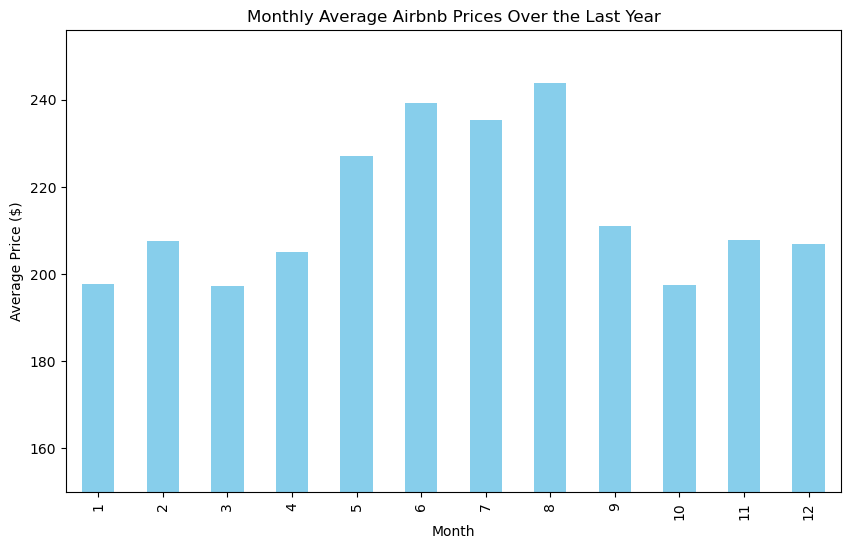

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar

# Filter data to only include the last year
one_year_ago = pd.Timestamp('2023-09-12') - pd.DateOffset(years=1)
last_year_data = calendar_year[calendar_year['date'] >= one_year_ago]

# Group by month and calculate the average price for each month
last_year_data['month'] = last_year_data['date'].dt.month
monthly_prices = last_year_data.groupby('month')['price'].mean()

# Plotting the bar graph
plt.figure(figsize=(10, 6))
ax = monthly_prices.plot(kind='bar', color='skyblue')
plt.title('Monthly Average Airbnb Prices Over the Last Year')
plt.xlabel('Month')
plt.ylabel('Average Price ($)')

ax.set_ylim(bottom=150)

plt.show()


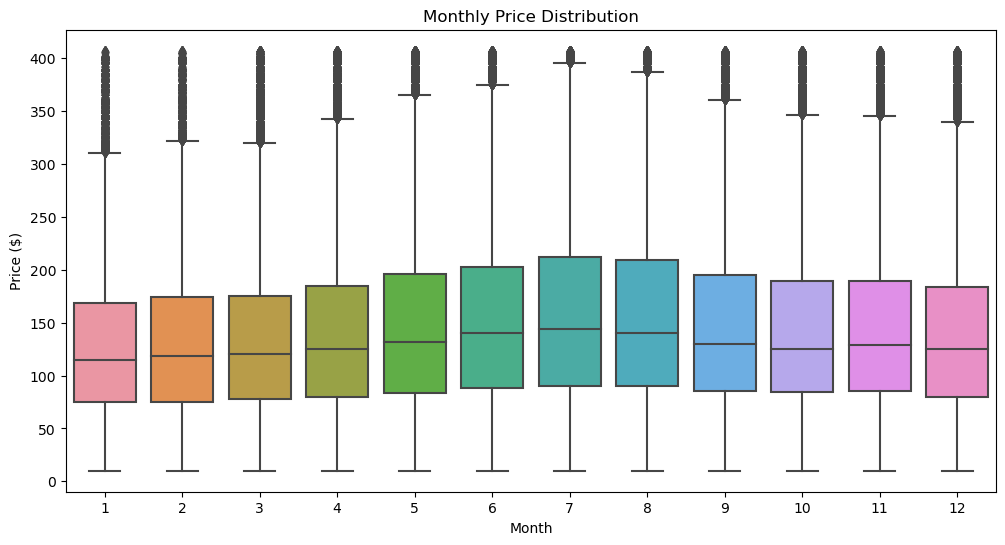

In [94]:
# Plotting boxplot for monthly price distribution
plt.figure(figsize=(12, 6))
sns.boxplot(x='month', y='price', data=calendar_year_nooutlier)
plt.title('Monthly Price Distribution')
plt.xlabel('Month')
plt.ylabel('Price ($)')
plt.show()


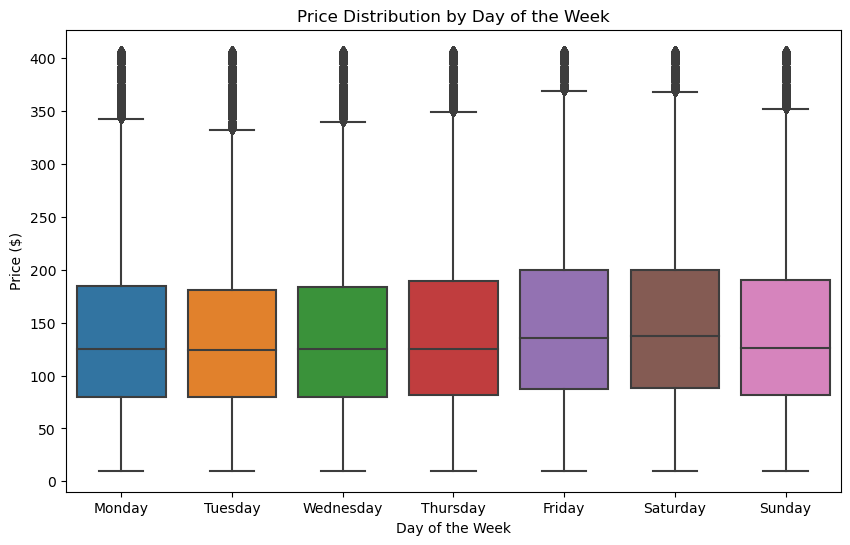

In [95]:
import calendar

# Add a 'day_of_week' column
calendar_year_nooutlier['day_of_week'] = calendar_year_nooutlier['date'].dt.day_name()

# Plotting the boxplot for price distribution by day of the week
plt.figure(figsize=(10, 6))
sns.boxplot(x='day_of_week', y='price', data=calendar_year_nooutlier, order=list(calendar.day_name))
plt.title('Price Distribution by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Price ($)')
plt.show()


## Remove outliers?

In [85]:
calendar_year.describe()

,listing_id,price,year,month,week
count,2.125760e+06,2.125760e+06,2.125760e+06,2.125760e+06,2125760.0
mean,1.955094e+17,2.147295e+02,2.022967e+03,6.526027e+00,26.567123
std,3.071579e+17,1.294801e+03,1.783139e-01,3.447852e+00,15.042373
min,2.384000e+03,1.000000e+01,2.022000e+03,1.000000e+00,1.0
25%,2.788768e+07,8.700000e+01,2.023000e+03,4.000000e+00,14.0
50%,4.581263e+07,1.370000e+02,2.023000e+03,7.000000e+00,27.0
75%,5.876075e+17,2.150000e+02,2.023000e+03,1.000000e+01,40.0
max,7.854302e+17,9.999800e+04,2.023000e+03,1.200000e+01,52.0


In [82]:
q1 = np.percentile(calendar_year['price'],25)
q3 = np.percentile(calendar_year['price'],75)
intQ_range = q3-q1

#Tukey's fences
Lower_fence = q1 - 1.5*intQ_range
Upper_fence = q3 + 1.5*intQ_range

#These are the outlying observations - those outside of Tukey's fences
Outlying_obs = calendar_year[(calendar_year.price<Lower_fence) | (calendar_year.price>Upper_fence)]
Outlying_obs

calendar_year_nooutlier = calendar_year.drop(Outlying_obs.index)
calendar_year_nooutlier.describe()

,listing_id,price,year,month,week
count,1.651228e+06,1.651228e+06,1.651228e+06,1.651228e+06,1651228.0
mean,1.893790e+17,1.460337e+02,2.022966e+03,6.537636e+00,26.628033
std,3.050222e+17,8.501454e+01,1.816075e-01,3.467852e+00,15.127869
min,2.384000e+03,1.000000e+01,2.022000e+03,1.000000e+00,1.0
25%,2.663873e+07,8.200000e+01,2.023000e+03,4.000000e+00,13.0
50%,4.448972e+07,1.270000e+02,2.023000e+03,7.000000e+00,27.0
75%,5.802997e+17,1.900000e+02,2.023000e+03,1.000000e+01,40.0
max,7.854302e+17,4.070000e+02,2.023000e+03,1.200000e+01,52.0
